In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ops_area_polygon is pasted straight from 
#  the SMODE Pilot Experimental Plan (page 7)
colnames = ['lat_deg','lat_min','lon_deg','lon_min']
df = pd.read_csv('tools/ops_area_polygon.csv',sep=',',
                 names=colnames,header=0)

In [4]:
df

,lat_deg,lat_min,lon_deg,lon_min
0,38,5.500,-125,-22.067
1,37,43.000,-124,-0.067
2,37,45.311,-123,-26.204
3,36,58.427,-122,-57.088
4,36,20.000,-124,-19.067


In [5]:
# append last first row to close the polygon
df = df.append(df.iloc[0],ignore_index=True)

In [6]:
lat = df.lat_deg + df.lat_min/60
lon = df.lon_deg + df.lon_min/60

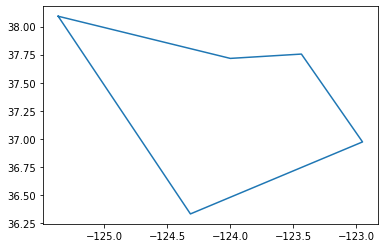

In [7]:
plt.plot(lon,lat)

In [8]:
df_polygon = pd.concat([lon, lat], axis=1).\
                          rename(columns={0: 'longitude', 
                                          1: 'latitude'}
                    )

In [9]:
df_polygon.to_json('tools/ops_area_polygon.json')

In [10]:
!cat tools/ops_area_polygon.json

{"longitude":{"0":-125.3677833333,"1":-124.0011166667,"2":-123.4367333333,"3":-122.9514666667,"4":-124.3177833333,"5":-125.3677833333},"latitude":{"0":38.0916666667,"1":37.7166666667,"2":37.7551833333,"3":36.9737833333,"4":36.3333333333,"5":38.0916666667}}

In [11]:
df_polygon.longitude.values

array([-125.36778333, -124.00111667, -123.43673333, -122.95146667,
       -124.31778333, -125.36778333])

In [16]:
df_polygon.latitude.values

array([38.09166667, 37.71666667, 37.75518333, 36.97378333, 36.33333333,
       38.09166667])

In [27]:
# Save MAPEXTENT to JSON file
df_extent = pd.read_csv('tools/map_extent.csv',sep=', ')

<ipython-input-27-5cdb4d58a97f>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_extent = pd.read_csv('tools/map_extent.csv',sep=', ')


In [28]:
df_extent.to_json('tools/map_extent.json')

In [29]:
# Verify that it worked
mapextent = pd.read_json('tools/map_extent.json')